In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,...,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set,target
0,-31,22,1.127497,0.03,1.44,-0.7,-9,6,0.011,-0.9,...,0.0,0.0,0.0,9.0,0.0,0.000,-10.0,0.336472,0.050,1.4
1,185,-40,1.363425,-0.10,0.30,-1.3,-12,16,0.022,0.1,...,0.0,0.0,0.0,9.0,0.0,0.000,-10.0,-0.693147,0.016,0.5
2,170,-17,0.794534,0.12,0.31,0.6,-6,9,-0.006,-2.5,...,0.0,0.0,0.0,9.0,0.0,0.001,-10.0,-0.916291,0.018,0.5
3,-399,-8,0.697676,-0.13,0.80,-0.7,-7,15,0.008,0.1,...,0.0,0.0,0.0,9.0,0.0,0.000,-10.0,-0.916291,0.015,0.2
4,-24,-18,1.127497,0.18,0.85,-1.8,-18,-3,0.019,-0.2,...,0.0,0.0,0.0,9.0,0.0,0.000,-10.0,-0.223144,0.030,1.5


In [3]:
num_rows = len(df_train)
num_rows

8250

In [4]:
# target
mean = df_train['target'].mean()
std = df_train['target'].std()
range_target = df_train['target'].max()-df_train['target'].min()
print("mean:",mean)
print("std:",std)
print("range:",range_target)

mean: 0.8672121212121211
std: 0.4050357160037629
range: 3.5


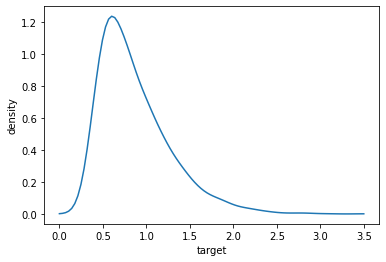

In [5]:
# kernel density estimate
from sklearn.neighbors import KernelDensity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

target = df_train['target'].values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(target)

x = np.linspace(df_train['target'].min(), df_train['target'].max(), 100).reshape(-1, 1)
logtarget = kde.score_samples(x)
plt.plot(x[:, 0], np.exp(logtarget))
plt.xlabel('target')
plt.ylabel('density')
plt.show()

The values of target are mainly concentrated in the range of 0.5-1.0

In [6]:
# The features and how they relate to the target
df_mean = df_train.mean()
df_mean

acc_rate           -1.152606e+01
track              -1.267297e+01
m                   1.051280e+00
n                   6.038667e-02
current_pitch       6.293709e-01
current_roll        6.124848e-02
absoluate_roll     -1.100485e+01
climb_delta        -9.203636e-01
roll_rate_delta    -9.567273e-04
climb_delta_diff   -4.784242e-02
time1               2.187236e-02
time2               2.188558e-02
time3               2.188558e-02
time4               2.189782e-02
time5               2.189794e-02
time6               2.191770e-02
time7               2.191818e-02
time8               2.193745e-02
time9               2.193745e-02
time10              2.195418e-02
time11              4.390739e-02
time12              2.196885e-02
time13              2.196921e-02
time14              2.198194e-02
time1_delta        -1.320000e-04
time2_delta        -1.212121e-07
time3_delta        -6.266667e-05
time4_delta        -3.636364e-07
time5_delta        -8.072727e-05
time6_delta        -7.272727e-07
time7_delt

In [7]:
df_std = df_train.std()
df_std

acc_rate            259.637258
track                25.675733
m                     0.320703
n                     0.118805
current_pitch         0.313628
current_roll          0.967274
absoluate_roll        4.140399
climb_delta          10.334136
roll_rate_delta       0.013203
climb_delta_diff      1.132179
time1                 0.006873
time2                 0.006906
time3                 0.006906
time4                 0.006914
time5                 0.006914
time6                 0.006924
time7                 0.006925
time8                 0.006933
time9                 0.006933
time10                0.006939
time11                0.013876
time12                0.006953
time13                0.006954
time14                0.006960
time1_delta           0.000695
time2_delta           0.000011
time3_delta           0.000462
time4_delta           0.000025
time5_delta           0.000491
time6_delta           0.000049
time7_delta           0.000113
time8_delta           0.000011
time9_de

In [8]:
df_range = df_train.max()-df_train.min()
df_range

acc_rate            1921.000000
track                189.000000
m                      2.669835
n                      1.150000
current_pitch          3.000000
current_roll           5.900000
absoluate_roll        20.000000
climb_delta           90.000000
roll_rate_delta        0.136000
climb_delta_diff      17.500000
time1                  0.066000
time2                  0.066000
time3                  0.066000
time4                  0.066000
time5                  0.066000
time6                  0.066000
time7                  0.066000
time8                  0.064000
time9                  0.064000
time10                 0.062000
time11                 0.124000
time12                 0.062000
time13                 0.062000
time14                 0.061000
time1_delta            0.009000
time2_delta            0.001000
time3_delta            0.010000
time4_delta            0.002000
time5_delta            0.010000
time6_delta            0.004000
time7_delta            0.001600
time8_de

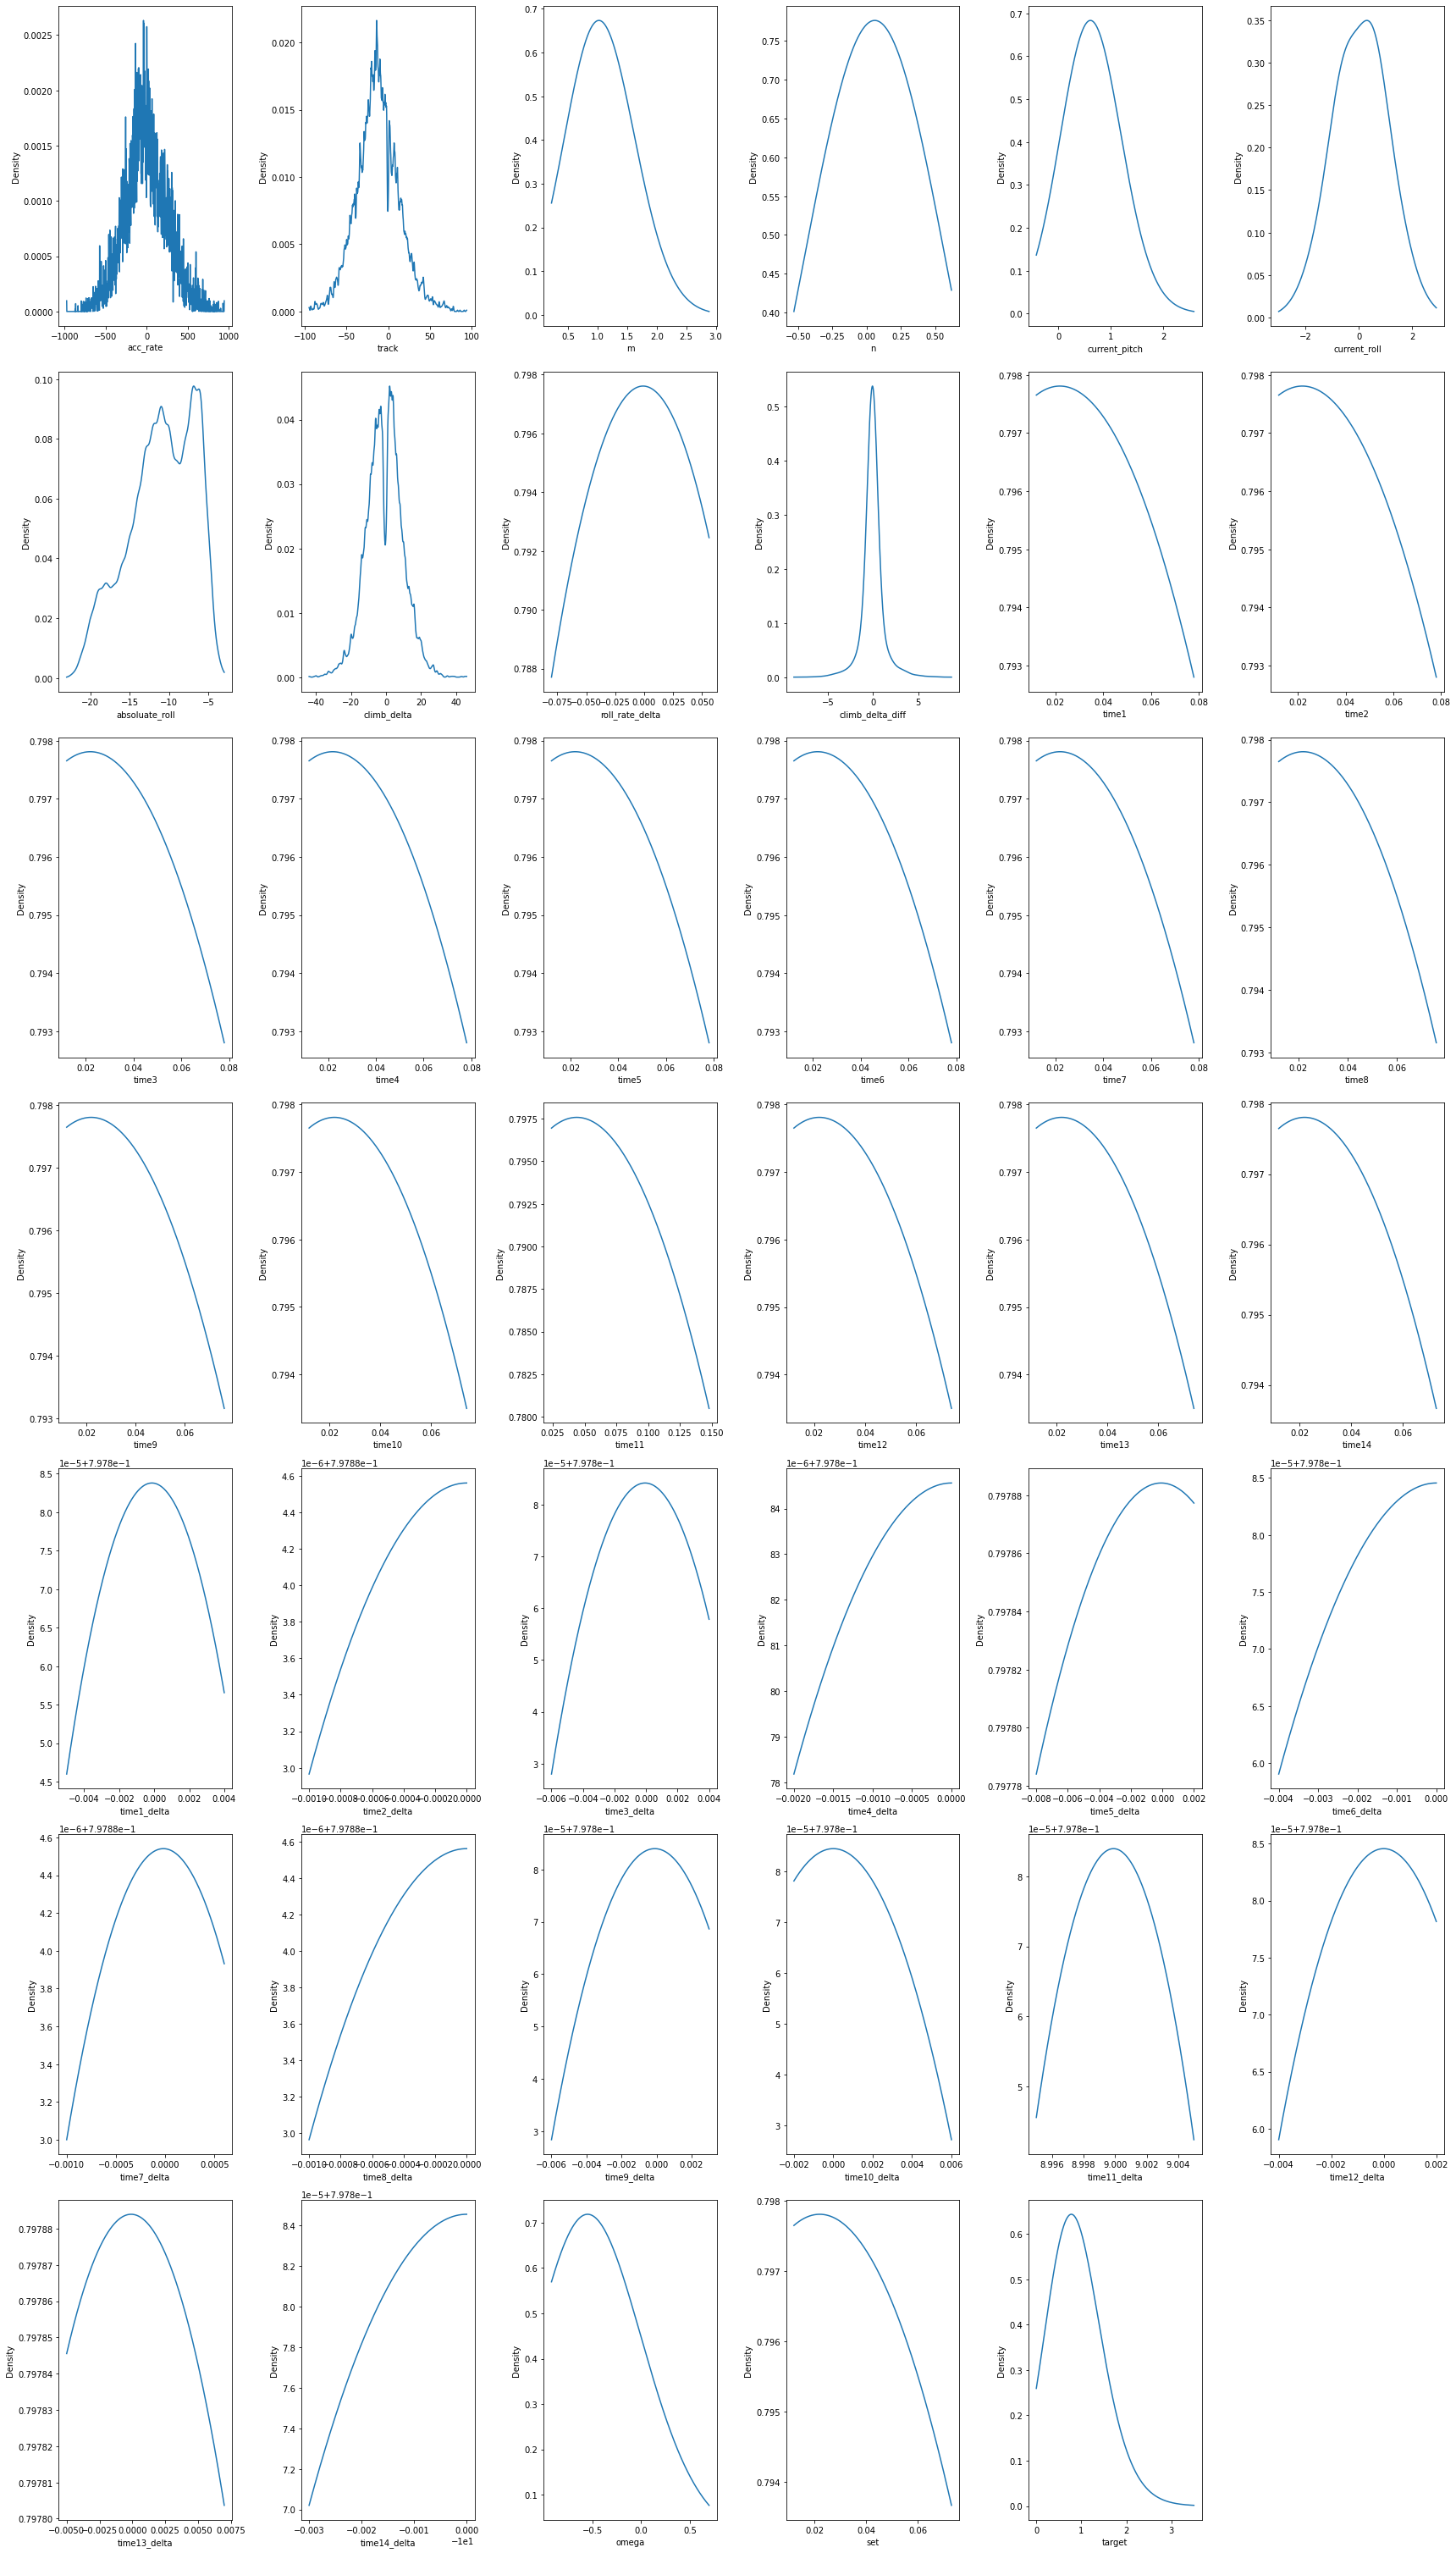

In [9]:
# make a kernel density estimate of the distribution for each feature
nrows = (len(df_train.columns) - 1) // 6 + 1
fig, axes = plt.subplots(nrows=nrows, ncols=6, figsize=(24, 6*nrows))

for i, col in enumerate(df_train.columns):
    row_i = i // 6
    col_i = i % 6
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df_train[col].values.reshape(-1, 1))

    x_features = np.linspace(df_train[col].min(), df_train[col].max(), 1000)
    log_prob = kde.score_samples(x_features.reshape(-1, 1))

    axes[row_i, col_i].plot(x_features, np.exp(log_prob))
    # Set labels
    axes[row_i, col_i].set_xlabel(col)
    axes[row_i, col_i].set_ylabel('Density')

for i in range(len(df_train.columns), nrows*6):
    row_i = i // 6
    col_i = i % 6
    fig.delaxes(axes[row_i, col_i])

plt.tight_layout()
plt.show()

In [10]:
#correlation 
corr_target = df_train.corr()['target']
corr_target

acc_rate            0.079642
track              -0.061289
m                   0.334420
n                   0.396974
current_pitch       0.308080
current_roll        0.106015
absoluate_roll     -0.704515
climb_delta        -0.056970
roll_rate_delta    -0.052774
climb_delta_diff   -0.073560
time1               0.641312
time2               0.640405
time3               0.640405
time4               0.640398
time5               0.640413
time6               0.638817
time7               0.638829
time8               0.636374
time9               0.636374
time10              0.633567
time11              0.633707
time12              0.630812
time13              0.630761
time14              0.628335
time1_delta         0.035307
time2_delta        -0.009047
time3_delta         0.016617
time4_delta        -0.019433
time5_delta         0.010641
time6_delta        -0.019433
time7_delta         0.032115
time8_delta        -0.017202
time9_delta         0.040202
time10_delta       -0.002875
time11_delta  

In [11]:
corr_abs = df_train.corr().abs()
top3_features_corr = corr_abs.nlargest(4, ['target'])['target']
top3_features_corr

target            1.000000
absoluate_roll    0.704515
time1             0.641312
time5             0.640413
Name: target, dtype: float64

In [12]:
top3_features_corr_least = corr_abs.nsmallest(3, ['target'])['target']
top3_features_corr_least

time10_delta    0.002875
time12_delta    0.008918
time2_delta     0.009047
Name: target, dtype: float64

In [13]:
top3_features = top3_features_corr.index[1:]
top3_features

Index(['absoluate_roll', 'time1', 'time5'], dtype='object')

top3 features: absoluate_roll -0.704515, time1 0.641312, time5 0.640413

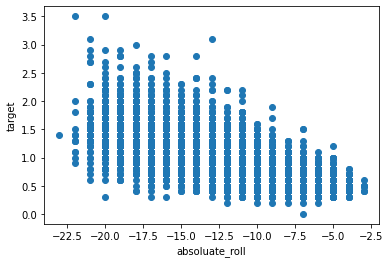

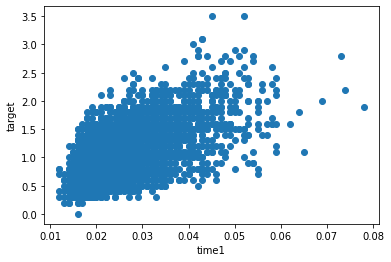

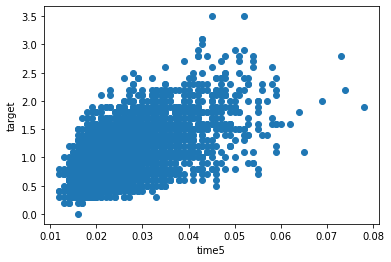

In [14]:
# scatter plot
for f in top3_features:
    plt.scatter(df_train[f], df_train['target'])
    plt.xlabel(f)
    plt.ylabel('target')
    plt.show()

In [15]:
# The relationships between features
heatmap = df_train.corr().style.background_gradient(cmap='coolwarm')

# Display the heatmap
heatmap

,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10,time11,time12,time13,time14,time1_delta,time2_delta,time3_delta,time4_delta,time5_delta,time6_delta,time7_delta,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set,target
acc_rate,1.000000,-0.008467,0.155929,0.099889,-0.789164,-0.133945,-0.043429,0.077362,0.154626,-0.341051,0.088944,0.074130,0.074130,0.067064,0.067050,0.059304,0.059243,0.047333,0.047333,0.032179,0.032066,0.014077,0.013903,-0.004301,0.200163,0.011004,0.151350,0.011616,0.155783,0.011616,0.209753,0.007484,0.231511,0.015785,0.269124,0.024040,0.274058,0.009429,-0.023902,-0.004345,0.079642
track,-0.008467,1.000000,0.056252,0.347037,0.004609,0.012356,0.075668,-0.458368,-0.069289,-0.007849,0.004875,0.011048,0.011048,0.014134,0.014125,0.015803,0.015779,0.016611,0.016611,0.017197,0.017200,0.016905,0.016890,0.016504,-0.085065,-0.003291,-0.060930,0.003640,-0.023667,0.003640,-0.003048,0.005715,0.000368,0.000861,0.020094,-0.000238,0.021057,0.011462,0.023334,0.016481,-0.061289
m,0.155929,0.056252,1.000000,0.137915,-0.112548,-0.034172,-0.052549,-0.095433,0.127867,-0.127871,0.038749,0.041675,0.041675,0.042506,0.042489,0.040307,0.040215,0.036067,0.036067,0.030842,0.030901,0.025034,0.024974,0.018657,-0.000689,0.023209,0.001650,0.019686,0.046176,0.019686,0.080429,0.010404,0.088888,-0.004812,0.101205,0.016218,0.108116,0.027488,0.022356,0.018593,0.334420
n,0.099889,0.347037,0.137915,1.000000,0.146059,0.039020,-0.395333,-0.766239,-0.203489,-0.443127,0.360342,0.375389,0.375389,0.382694,0.382723,0.389063,0.389151,0.397736,0.397736,0.407836,0.408024,0.415496,0.415628,0.420160,-0.196451,-0.018500,-0.143256,-0.028967,-0.131710,-0.028967,-0.146613,-0.023134,-0.149312,-0.016142,-0.126383,-0.030081,-0.067889,-0.013360,0.412854,0.420111,0.396974
current_pitch,-0.789164,0.004609,-0.112548,0.146059,1.000000,0.090862,-0.165691,-0.190116,-0.140952,0.237025,0.526786,0.540229,0.540229,0.546666,0.546682,0.554092,0.554151,0.565241,0.565241,0.579025,0.579152,0.595326,0.595524,0.611331,-0.191737,-0.033726,-0.139419,-0.029863,-0.163734,-0.029863,-0.195832,-0.016523,-0.214201,-0.004538,-0.257161,-0.046048,-0.247561,-0.057729,0.606788,0.611388,0.308080
current_roll,-0.133945,0.012356,-0.034172,0.039020,0.090862,1.000000,0.195973,-0.159219,-0.669410,0.032057,-0.040590,-0.036062,-0.036062,-0.033292,-0.033285,-0.030816,-0.030773,-0.027659,-0.027659,-0.024379,-0.024168,-0.021967,-0.021960,-0.019301,-0.052669,-0.012963,-0.052150,-0.009247,-0.047894,-0.009247,-0.059576,-0.003856,-0.045503,-0.025998,-0.026569,-0.002146,-0.033200,-0.008217,0.002704,-0.019278,0.106015
absoluate_roll,-0.043429,0.075668,-0.052549,-0.395333,-0.165691,0.195973,1.000000,-0.035678,-0.170911,0.011081,-0.363393,-0.359553,-0.359553,-0.358120,-0.358138,-0.357226,-0.357293,-0.356357,-0.356357,-0.356667,-0.356823,-0.356609,-0.356642,-0.357073,-0.074866,0.023922,-0.038438,0.024960,0.004934,0.024960,0.004948,0.015943,0.014867,0.012622,0.020640,0.016494,0.029279,0.011207,-0.368673,-0.357018,-0.704515
climb_delta,0.077362,-0.458368,-0.095433,-0.766239,-0.190116,-0.159219,-0.035678,1.000000,0.337635,0.037423,-0.150594,-0.170936,-0.170936,-0.180247,-0.180273,-0.188873,-0.188938,-0.200401,-0.200401,-0.213967,-0.214085,-0.226250,-0.226385,-0.237523,0.270737,0.002216,0.189783,0.017269,0.169062,0.017269,0.190124,0.018198,0.193864,0.011402,0.185057,0.023437,0.159301,0.002698,-0.270175,-0.237490,-0.056970
roll_rate_delta,0.154626,-0.069289,0.127867,-0.203489,-0.140952,-0.669410,-0.170911,0.337635,1.000000,-0.000428,0.000337,-0.006185,-0.006185,-0.009598,-0.009621,-0.014681,-0.014754,-0.022380,-0.022380,-0.029927,-0.029967,-0.036808,-0.036907,-0.042885,0.090064,0.001704,0.069646,0.014221,0.108991,0.014221,0.145336,0.015047,0.119454,0.005779,0.107556,0.014961,0.081223,-0.005729,-0.058116,-0.042861,-0.052774
climb_delta_diff,-0.341051,-0.007849,

In [16]:
# milestone2
# find correlated paired features
corr_abs = df_train.corr().abs()
np.fill_diagonal(corr_abs.values, 0)
threshold = 0.97
correlated_pairs = [(i, j) for i in corr_abs.columns 
                           for j in corr_abs.index 
                           if corr_abs.loc[i, j] > threshold]
correlated_pairs

[('time1', 'time2'),
 ('time1', 'time3'),
 ('time1', 'time4'),
 ('time1', 'time5'),
 ('time1', 'time6'),
 ('time1', 'time7'),
 ('time1', 'time8'),
 ('time1', 'time9'),
 ('time1', 'time10'),
 ('time1', 'time11'),
 ('time1', 'time12'),
 ('time1', 'time13'),
 ('time1', 'time14'),
 ('time1', 'set'),
 ('time2', 'time1'),
 ('time2', 'time3'),
 ('time2', 'time4'),
 ('time2', 'time5'),
 ('time2', 'time6'),
 ('time2', 'time7'),
 ('time2', 'time8'),
 ('time2', 'time9'),
 ('time2', 'time10'),
 ('time2', 'time11'),
 ('time2', 'time12'),
 ('time2', 'time13'),
 ('time2', 'time14'),
 ('time2', 'set'),
 ('time3', 'time1'),
 ('time3', 'time2'),
 ('time3', 'time4'),
 ('time3', 'time5'),
 ('time3', 'time6'),
 ('time3', 'time7'),
 ('time3', 'time8'),
 ('time3', 'time9'),
 ('time3', 'time10'),
 ('time3', 'time11'),
 ('time3', 'time12'),
 ('time3', 'time13'),
 ('time3', 'time14'),
 ('time3', 'set'),
 ('time4', 'time1'),
 ('time4', 'time2'),
 ('time4', 'time3'),
 ('time4', 'time5'),
 ('time4', 'time6'),
 ('t

Interpret the matrix to see which features are highly correlated to each other. 

In [17]:
#Select 1 feature and take the 3 features that are most correlated to your chosen feature. Plot a 4x4 matrix of scatter plots where each off-diagonal scatter plot is between the corresponding two distinct features and the diagonals are kernel density estimates for each corresponding feature. Interpret this matrix of scatter plots. 
climb_delta = df_train['climb_delta']
corr_abs = df_train.corr().abs()
top3_corr = corr_abs.nlargest(4, 'climb_delta')['climb_delta']
top3_corr

climb_delta        1.000000
n                  0.766239
track              0.458368
roll_rate_delta    0.337635
Name: climb_delta, dtype: float64

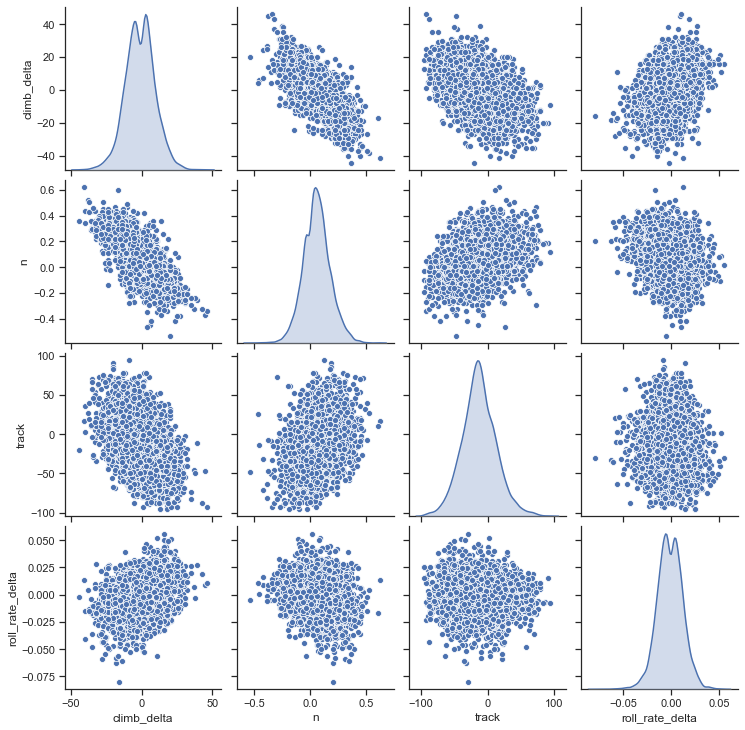

In [18]:
import seaborn as sns
top3_features_climb = top3_corr.index[1:]
top3_features_climb = df_train[top3_features_climb]

df_climb = pd.concat([climb_delta, top3_features_climb], axis=1)

# Create a 4x4 matrix of scatter plots
sns.set(style='ticks')
sns.pairplot(df_climb, diag_kind='kde', kind='scatter')

# Display
plt.show()

In [43]:
#baseline model
#linear regression, knn, random forest

In [44]:
#df_train = pd.read_csv('/Users/wangyu/Desktop/517/517final/train.csv')
X = df_train.iloc[:, :40]  # Features
y = df_train.iloc[:, 40]   # Target
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=517)

In [45]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Initialize cv,in-sample and out-of-sample errors
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=517)
in_sample_mse = np.zeros(k)
out_of_sample_mse = np.zeros(k)
in_sample_z_scores = np.array([])
out_of_sample_z_scores = np.array([])

for i, (train_index, test_index) in enumerate(kf.split(X)):
    model = LinearRegression()
    # Splitinng data into training and testing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fitting the model on the training set
    model.fit(X_train, y_train)
    # Computing in-sample MSE
    y_pred_train = model.predict(X_train)
    in_sample_mse[i] = np.mean((y_train - y_pred_train)**2)
    # Computing out-of-sample MSE
    y_pred_test = model.predict(X_test)
    out_of_sample_mse[i] = np.mean((y_test - y_pred_test)**2)
    # Computing z-scores of errors
    in_sample_z_scores = np.concatenate((in_sample_z_scores, (y_train - y_pred_train) / np.std(y_train - y_pred_train)))
    out_of_sample_z_scores = np.concatenate((out_of_sample_z_scores, (y_test - y_pred_test) / np.std(y_test - y_pred_test)))

#  (mse=sum(mse)/10)
print(f"In-sample MSE: {np.sum(in_sample_mse)/10}")
print(f"Out-of-sample MSE: {np.sum(out_of_sample_mse)/10}")

In-sample MSE: 0.02956420464328463
Out-of-sample MSE: 0.030177867063006004


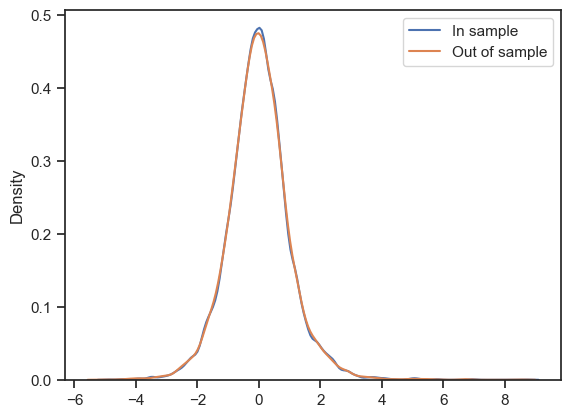

In [46]:
# Plot kernel density estimate of z-scores of errors(using sns)
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(in_sample_z_scores, label='In sample')
sns.kdeplot(out_of_sample_z_scores, label='Out of sample')
plt.legend()
plt.show()

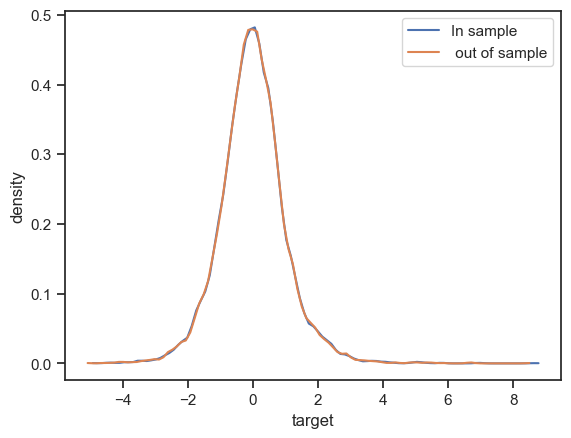

In [47]:
# Plot kernel density estimate of z-scores of errors(using the method in data exploration part)
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(in_sample_z_scores.reshape(-1, 1))

x1 = np.linspace(in_sample_z_scores.min(),in_sample_z_scores.max(), 100).reshape(-1, 1)
logtarget1 = kde.score_samples(x1)
plt.plot(x1[:, 0], np.exp(logtarget1), label= 'In sample')

kde.fit(out_of_sample_z_scores.reshape(-1, 1))
x2 = np.linspace(out_of_sample_z_scores.min(),out_of_sample_z_scores.max(), 100).reshape(-1, 1)
logtarget2 = kde.score_samples(x2)
plt.plot(x2[:, 0], np.exp(logtarget2),label =' out of sample')

plt.legend(loc='upper right')
plt.xlabel('target')
plt.ylabel('density')
plt.show()

In [48]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

# Initialize knn regressor and cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=517)
in_sample_mse_knn = np.zeros(k)
out_of_sample_mse_knn = np.zeros(k)
in_sample_z_scores_knn = np.array([])
out_of_sample_z_scores_knn = np.array([])

for i, (train_index, test_index) in enumerate(kf.split(X)):
    model = KNeighborsRegressor(n_neighbors=5)
    # Spliting data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fiting the model on the training set
    model.fit(X_train, y_train)
    # Computing in-sample MSE
    y_pred_train = model.predict(X_train)
    in_sample_mse_knn[i] = np.mean((y_train - y_pred_train)**2)
    # Computing out-of-sample MSE
    y_pred_test = model.predict(X_test)
    out_of_sample_mse_knn[i] = np.mean((y_test - y_pred_test)**2)
    # Computing z-scores of errors
    in_sample_z_scores_knn = np.concatenate((in_sample_z_scores_knn, (y_train - y_pred_train) / np.std(y_train - y_pred_train)))
    out_of_sample_z_scores_knn = np.concatenate((out_of_sample_z_scores_knn, (y_test - y_pred_test) / np.std(y_test - y_pred_test)))


In [49]:
# (mse=sum(mse)/10)
print(f"In-sample MSE: {np.sum(in_sample_mse_knn)/10}")
print(f"Out-of-sample MSE: {np.sum(out_of_sample_mse_knn)/10}")

In-sample MSE: 0.08284385723905725
Out-of-sample MSE: 0.12735898181818184


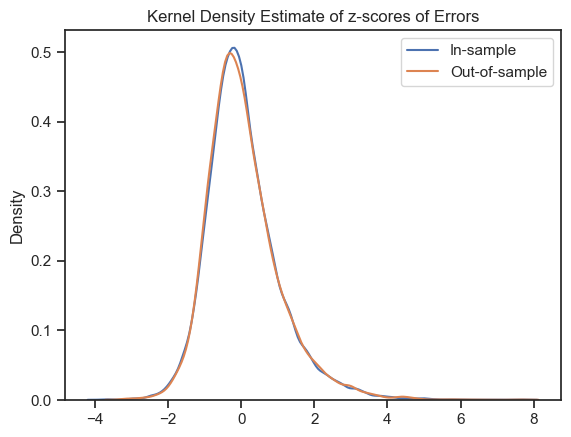

In [50]:
# Plot kernel density estimate of z-scores of errors
sns.kdeplot(in_sample_z_scores_knn, label='In-sample')
sns.kdeplot(out_of_sample_z_scores_knn, label='Out-of-sample')
plt.legend()
plt.title("Kernel Density Estimate of z-scores of Errors")
plt.show()

In [51]:
# random forest
from sklearn.ensemble import RandomForestRegressor
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=517)
in_sample_mse_rf = np.zeros(k)
out_of_sample_mse_rf = np.zeros(k)


in_sample_z_scores_rf = np.array([])
out_of_sample_z_scores_rf = np.array([])

for train_index, test_index in kf.split(X):
    model = RandomForestRegressor(n_estimators=100, random_state=517)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit the model  
    model.fit(X_train, y_train)
    # Compute in-sample MSE
    y_pred_train = model.predict(X_train)
    in_sample_mse_rf[i] = np.mean((y_train - y_pred_train)**2)
    # Compute out-of-sample MSE
    y_pred_test = model.predict(X_test)
    out_of_sample_mse_rf[i] = np.mean((y_test - y_pred_test)**2)
    # Compute z-scores of errors
    in_sample_z_scores_rf = np.concatenate((in_sample_z_scores_rf, (y_train - y_pred_train) / np.std(y_train - y_pred_train)))
    out_of_sample_z_scores_rf = np.concatenate((out_of_sample_z_scores_rf, (y_test - y_pred_test) / np.std(y_test - y_pred_test)))


# (mse=sum(mse)/10)
print(f"In-sample MSE: {np.sum(in_sample_mse_rf)/10}")
print(f"Out-of-sample MSE: {np.sum(out_of_sample_mse_rf)/10}")

In-sample MSE: 0.00037806420202020184
Out-of-sample MSE: 0.00248993406060606


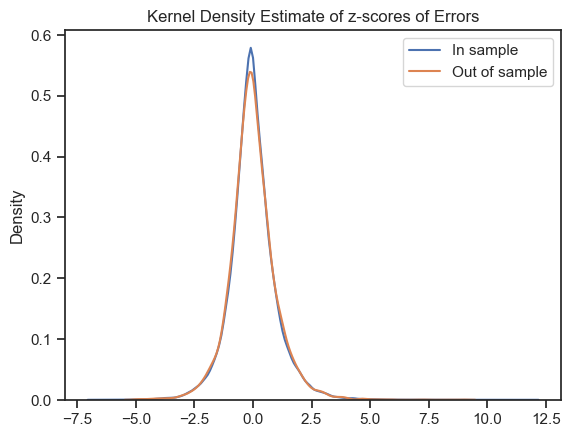

In [52]:
# Plot kernel density estimate of z-scores of errors
sns.kdeplot(in_sample_z_scores_rf, label='In sample')
sns.kdeplot(out_of_sample_z_scores_rf, label='Out of sample')
plt.legend()
plt.title("Kernel Density Estimate of z-scores of Errors")
plt.show()

In [53]:
in_sample_mse
#out_of_sample_mse

array([0.02984364, 0.02990497, 0.02966893, 0.02921515, 0.02932226,
       0.02960158, 0.02946189, 0.02964849, 0.02921139, 0.02976374])

In [55]:
# a paired t-test between linear regression and knn(in sample)
from scipy.stats import ttest_rel
t, p = ttest_rel(in_sample_mse, in_sample_mse_knn)
print("t-value:", t)
print("p-value:", p)

t-value: -256.23267868085185
p-value: 1.0688497322091913e-18


In [56]:
# a paired t-test between linear regression and knn(out of sample)

t, p = ttest_rel(out_of_sample_mse, out_of_sample_mse_knn)
print("t-value:", t)
print("p-value:", p)


t-value: -40.412598535000726
p-value: 1.7316322273029212e-11


In [57]:
# a paired t-test between linear regression and random forest(in sample)

t, p = ttest_rel(in_sample_mse, in_sample_mse_rf)
print("t-value:", t)
print("p-value:", p)

t-value: 80.18375667565306
p-value: 3.6949448625923245e-14


In [58]:
# a paired t-test between linear regression and random forest(out of sample)

t, p = ttest_rel(out_of_sample_mse, out_of_sample_mse_rf)
print("t-value:", t)
print("p-value:", p)


t-value: 9.90776431215194
p-value: 3.864940748996671e-06


In [59]:
# a paired t-test between knn regression and random forest(in sample)

t, p = ttest_rel(in_sample_mse_knn, in_sample_mse_rf)
print("t-value:", t)
print("p-value:", p)

t-value: 209.01987373357488
p-value: 6.6806181190583185e-18


In [60]:
# a paired t-test between knn and random forest(out of sample)

t, p = ttest_rel(out_of_sample_mse_knn, out_of_sample_mse_rf)
print("t-value:", t)
print("p-value:", p)


t-value: 29.164427934393935
p-value: 3.195124916575791e-10


In [61]:
#Baseline Models 2
X = df_train.drop('target',axis=1).values
y = df_train['target'].values

In [62]:
# k fold
# we use Gaussian Process, Neural Network and Adaptive or Gradient Boosting Regressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

clf_GPR = GaussianProcessRegressor(random_state=0)
clf_MLP = MLPRegressor(random_state=1, max_iter=100)
clf_GBR = GradientBoostingRegressor(random_state=0)

models = [('GPR', clf_GPR), ('MLP', clf_MLP), ('GBR', clf_GBR)]

# Perform k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True)

in_sample_scores = {}
out_sample_scores = {}

for name, model in models:
    in_sample_errors = []
    out_sample_errors = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        in_sample_error = mean_squared_error(y_train, y_train_pred)
        out_sample_error = mean_squared_error(y_test, y_test_pred)
        
        in_sample_errors.append(in_sample_error)
        out_sample_errors.append(out_sample_error)
    
    in_sample_scores[name] = in_sample_errors
    out_sample_scores[name] = out_sample_errors

d:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer

In [63]:
for name, errors in in_sample_scores.items():
    print(name,np.mean(errors))

GPR 9.119378573926888e-21
MLP 0.044588553639775756
GBR 0.02126693451655069


In [64]:
for name, errors in out_sample_scores.items():
    print(name,np.mean(errors))

GPR 0.9112069804654114
MLP 0.047651254240494226
GBR 0.025917537163817506


In [65]:
# Compute z-scores of errors
from scipy import stats

z_scores = {}
for name, errors in out_sample_scores.items():
    z_scores[name] = stats.zscore(errors)

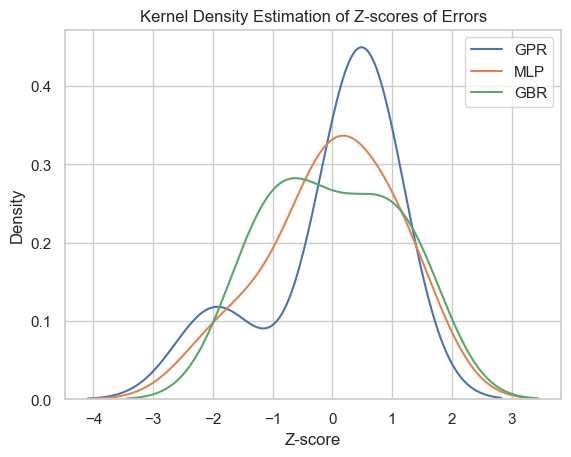

In [66]:
# Kernel density estimation
import seaborn as sns
sns.set(style="whitegrid")
for name, z in z_scores.items():
    sns.kdeplot(z, label=name)
plt.legend()
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.title("Kernel Density Estimation of Z-scores of Errors")
plt.show()

In [67]:
# Paired t-test for in-sample errors
in_sample_p_values = {}
for i, (name1, model1) in enumerate(models[:-1]):
    for name2, model2 in models[i + 1:]:
        t_stat, p_value = stats.ttest_rel(in_sample_scores[name1], in_sample_scores[name2])
        in_sample_p_values[(name1, name2)] = p_value

print("In-sample paired t-test p-values:", in_sample_p_values)

In-sample paired t-test p-values: {('GPR', 'MLP'): 2.9278575207102014e-14, ('GPR', 'GBR'): 1.294682538920902e-23, ('MLP', 'GBR'): 1.0260965866459248e-11}


In [68]:
# Paired t-test for out-sample errors
out_sample_p_values = {}
for i, (name1, model1) in enumerate(models[:-1]):
    for name2, model2 in models[i + 1:]:
        t_stat, p_value = stats.ttest_rel(out_sample_scores[name1], out_sample_scores[name2])
        out_sample_p_values[(name1, name2)] = p_value

print("Out-sample paired t-test p-values:", out_sample_p_values)

Out-sample paired t-test p-values: {('GPR', 'MLP'): 3.884091352174826e-15, ('GPR', 'GBR'): 2.3739045147561664e-15, ('MLP', 'GBR'): 3.0487245438611564e-07}


Data Preprocessing

In [19]:
# find any errors or missing values in our data
stats = df_train.describe()
stats

,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,...,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set,target
count,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,...,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000
mean,-11.526061,-12.672970,1.051280,0.060387,0.629371,0.061248,-11.004848,-0.920364,-0.000957,-0.047842,...,-1.212121e-07,-0.000099,4.848485e-07,8.999901,-7.272727e-07,-0.000093,-10.000001,-0.510279,0.021982,0.867212
std,259.637258,25.675733,0.320703,0.118805,0.313628,0.967274,4.140399,10.334136,0.013203,1.132179,...,1.100964e-05,0.000615,6.963359e-05,0.000631,6.030154e-05,0.000613,0.000037,0.257113,0.006961,0.405036
min,-975.000000,-95.000000,0.216536,-0.530000,-0.420000,-3.000000,-23.000000,-44.000000,-0.080000,-8.800000,...,-1.000000e-03,-0.006000,-2.000000e-03,8.995000,-4.000000e-03,-0.005000,-10.003000,-0.916291,0.012000,-0.000000
25%,-175.000000,-29.000000,0.802519,-0.020000,0.430000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.693147,0.018000,0.600000
50%,-23.000000,-13.000000,1.020201,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.510826,0.020000,0.800000
75%,157.000000,3.000000,1.258600,0.130000,0.800000,0.700000,-7.000000,6.000000,0.008000,0.200000,...,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.356675,0.023000,1.100000
max,946.000000,94.000000,2.886371,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,8.700000,...,0.000000e+00,0.003000,6.000000e-03,9.005000,2.000000e-03,0.007000,-10.000000,0.693147,0.073000,3.500000


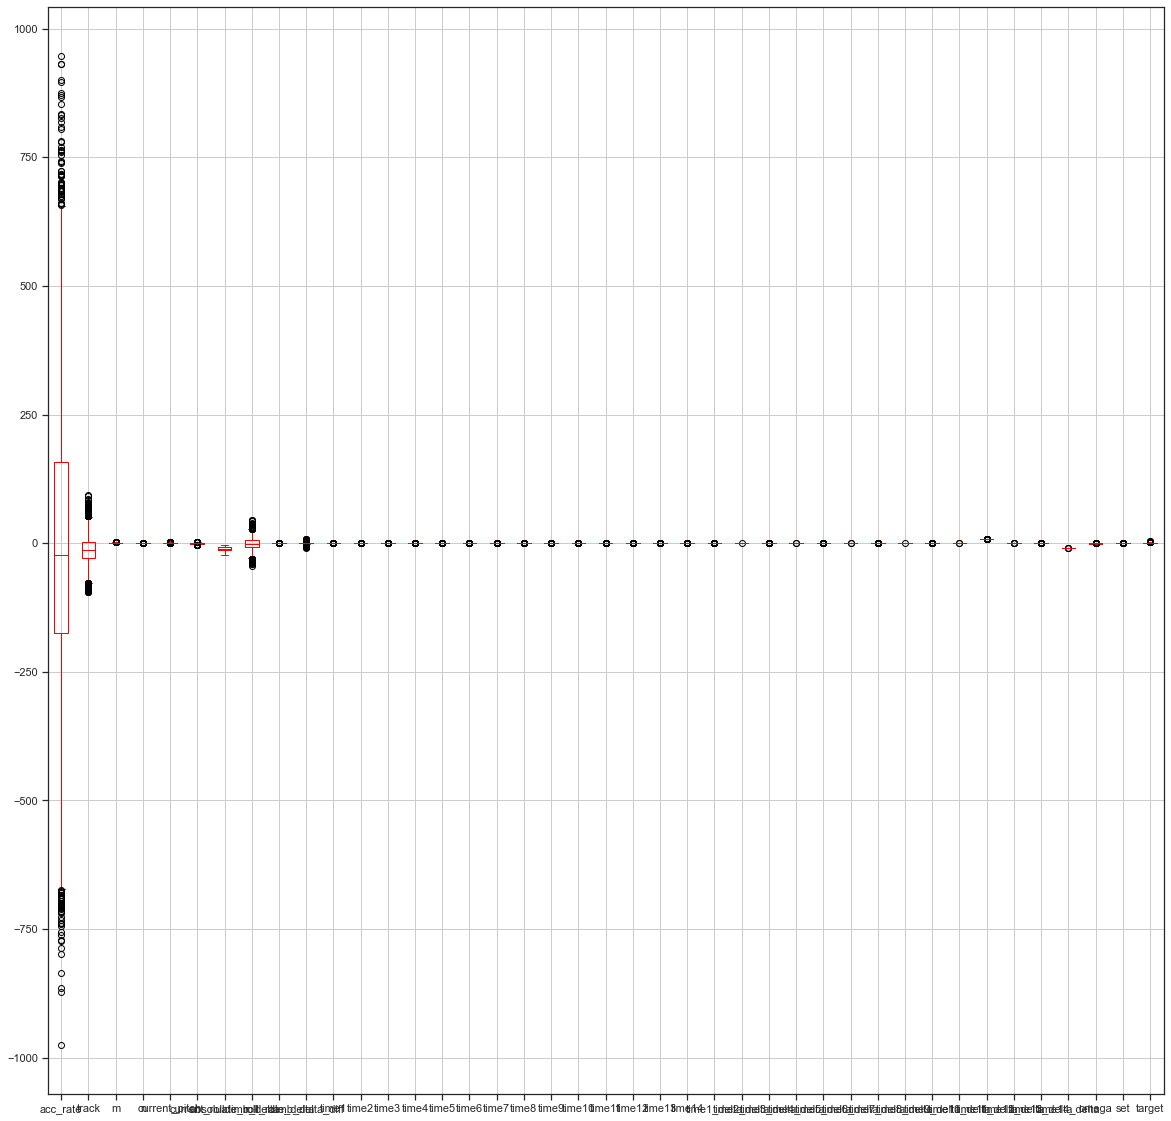

In [20]:
#outliers
df_train.boxplot(figsize=(20, 20), color = 'red')

We can find three columns have obvious outliers, they are acc_rate, track and climb_delta

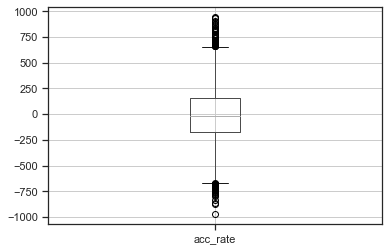

In [21]:
# acc_rate
boxplot = df_train.boxplot(column=['acc_rate'])
whiskers = boxplot.get_lines()[1:3]
lower_whisker = whiskers[0].get_ydata()[1]
upper_whisker = whiskers[1].get_ydata()[1]
outliers = df_train[(df_train['acc_rate'] < lower_whisker) | (df_train['acc_rate'] > upper_whisker)]
#print(outliers)
df_train_clean = df_train[(df_train['acc_rate'] >= lower_whisker) & (df_train['acc_rate'] <= upper_whisker)]


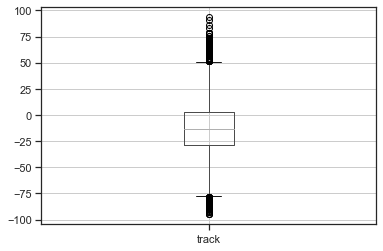

In [22]:
# track
boxplot = df_train_clean.boxplot(column=['track'])
whiskers = boxplot.get_lines()[1:3]
lower_whisker = whiskers[0].get_ydata()[1]
upper_whisker = whiskers[1].get_ydata()[1]
outliers = df_train_clean[(df_train_clean['track'] < lower_whisker) | (df_train_clean['track'] > upper_whisker)]
df_train_clean = df_train_clean[(df_train_clean['track'] >= lower_whisker) & (df_train_clean['track'] <= upper_whisker)]

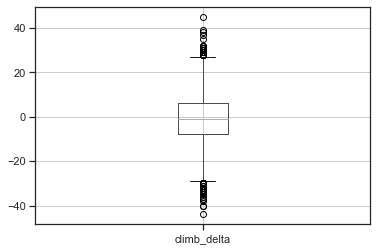

In [23]:
# climb_delta
boxplot = df_train_clean.boxplot(column=['climb_delta'])
whiskers = boxplot.get_lines()[1:3]
lower_whisker = whiskers[0].get_ydata()[1]
upper_whisker = whiskers[1].get_ydata()[1]
outliers = df_train_clean[(df_train_clean['climb_delta'] < lower_whisker) | (df_train_clean['climb_delta'] > upper_whisker)]
df_train_clean = df_train_clean[(df_train_clean['climb_delta'] >= lower_whisker) & (df_train_clean['climb_delta'] <= upper_whisker)]

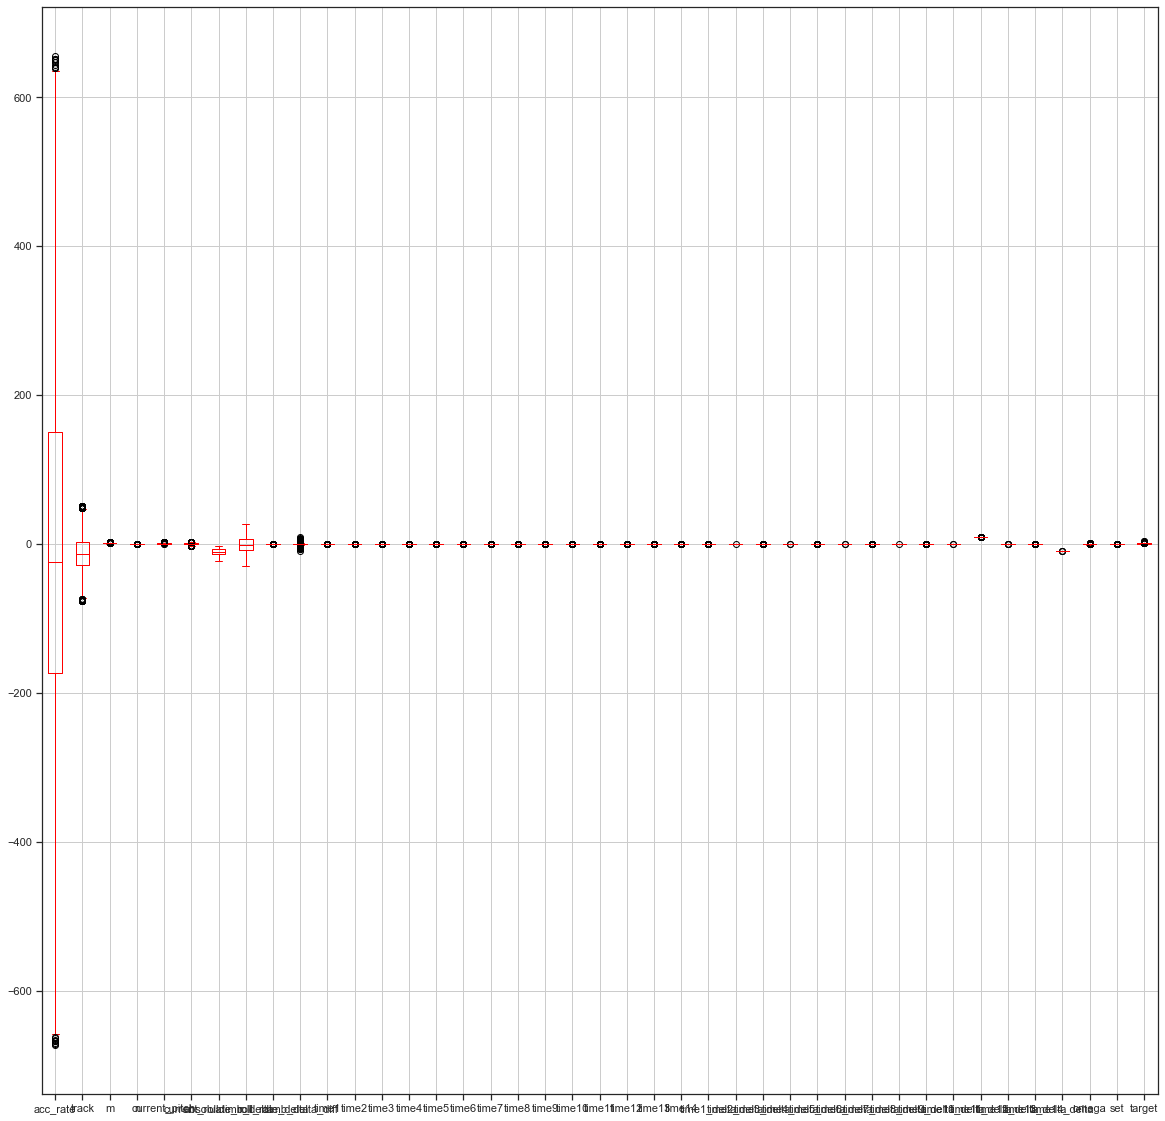

In [24]:
df_train_clean.boxplot(figsize=(20, 20), color = 'red')

In [25]:
num_rows_new = len(df_train_clean)
num_rows_new

7926

In [26]:
# duplicated rows
duplicated_rows = df_train_clean.duplicated()
print(duplicated_rows)

df_train_clean = df_train_clean.drop_duplicates()


0       False
1       False
2       False
3       False
4       False
        ...  
8244    False
8246    False
8247    False
8248    False
8249    False
Length: 7926, dtype: bool


no duplicated rows

In [27]:
# missing values
missing_values = df_train_clean.isnull().sum()
print(missing_values)

acc_rate            0
track               0
m                   0
n                   0
current_pitch       0
current_roll        0
absoluate_roll      0
climb_delta         0
roll_rate_delta     0
climb_delta_diff    0
time1               0
time2               0
time3               0
time4               0
time5               0
time6               0
time7               0
time8               0
time9               0
time10              0
time11              0
time12              0
time13              0
time14              0
time1_delta         0
time2_delta         0
time3_delta         0
time4_delta         0
time5_delta         0
time6_delta         0
time7_delta         0
time8_delta         0
time9_delta         0
time10_delta        0
time11_delta        0
time12_delta        0
time13_delta        0
time14_delta        0
omega               0
set                 0
target              0
dtype: int64


no missing values

In [28]:
# Perform normalization and k-fold
# GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, KFold
from scipy import stats

X = df_train_clean.drop('target',axis=1)
y = df_train_clean['target'].values

# Normalize data
X_normalized = (X - X.min()) / (X.max() - X.min())

# Model
model = GaussianProcessRegressor(random_state=0)
kf = KFold(n_splits=10, shuffle=True, random_state=106)
mse = make_scorer(mean_squared_error, greater_is_better=False)

# Cross validation
scores_before = cross_validate(model, X, y, cv=kf, scoring=mse, return_train_score=True)
scores_after = cross_validate(model, X_normalized, y, cv=kf, scoring=mse, return_train_score=True)

# Paired t-test
t_in_sample, p_in_sample = stats.ttest_rel(scores_after['train_score'], scores_before['train_score'])
t_out_sample, p_out_sample = stats.ttest_rel(scores_after['test_score'], scores_before['test_score'])

print("Paired t-test results for In-sample: ")
print("t-statistic: %f, p-value : %e"% (t_in_sample, p_in_sample))
print("Paired t-test results for Out-sample: ")
print("t-statistic: %f, p-value : %e"% (t_out_sample, p_out_sample))

Paired t-test results for In-sample: 
t-statistic: -36.026334, p-value : 4.841860e-11
Paired t-test results for Out-sample: 
t-statistic: -6.116298, p-value : 1.757377e-04


Clustering

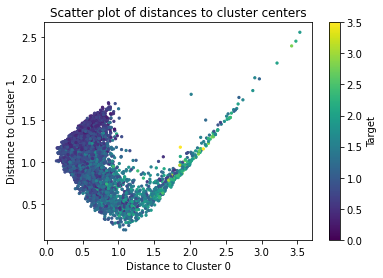

In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_normalized)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


distances = np.array([np.linalg.norm(X_normalized - center, axis=1) for center in cluster_centers]).T


plt.scatter(distances[:, 0], distances[:, 1], c=y, cmap='viridis', s=5)
plt.xlabel('Distance to Cluster 0')
plt.ylabel('Distance to Cluster 1')
plt.colorbar(label='Target')
plt.title('Scatter plot of distances to cluster centers')
plt.show()

In [24]:
lr = LinearRegression()
lr.fit(distances, y)
predictions = lr.predict(distances)
mse = mean_squared_error(y, predictions)
print(mse)
scores = cross_val_score(lr, distances, y, cv=5, scoring='neg_mean_squared_error')
mean_score = -np.mean(scores)
print(mean_score)

0.09152434832097654
0.0917001695732841


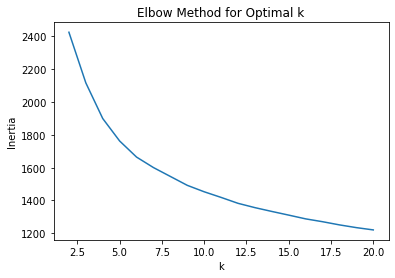

In [25]:
inertia_values = []

k_values = range(2, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

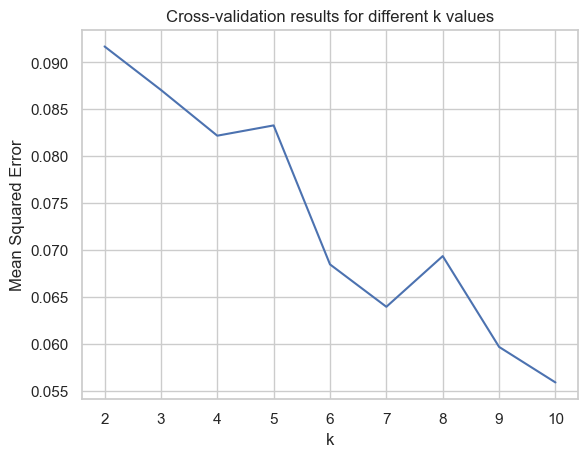

In [91]:
k_values = range(2, 11)
mean_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=10)
    kmeans.fit(X_normalized)
    cluster_centers = kmeans.cluster_centers_
    distances = np.array([np.linalg.norm(X_normalized - center, axis=1) for center in cluster_centers]).T
    
    lr = LinearRegression()
    scores = cross_val_score(lr, distances, y, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(-np.mean(scores))

plt.plot(k_values, mean_scores)
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Cross-validation results for different k values')
plt.show()

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

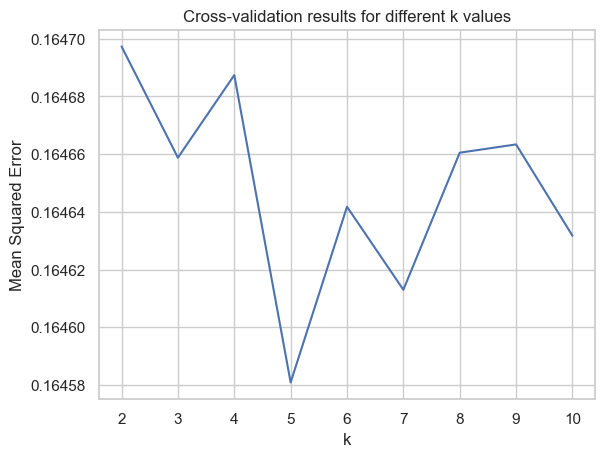

In [92]:
k_values = range(2, 11)
mean_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=10)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_
    distances = np.array([np.linalg.norm(X - center, axis=1) for center in cluster_centers]).T
    
    lr = LinearRegression()
    scores = cross_val_score(lr, distances, y, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(-np.mean(scores))

plt.plot(k_values, mean_scores)
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Cross-validation results for different k values')
plt.show()

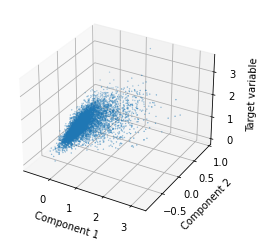

In [101]:
##pca
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Perform PCA, keeping two components. 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

#3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], y, s = 0.1)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Target variable')
plt.show()


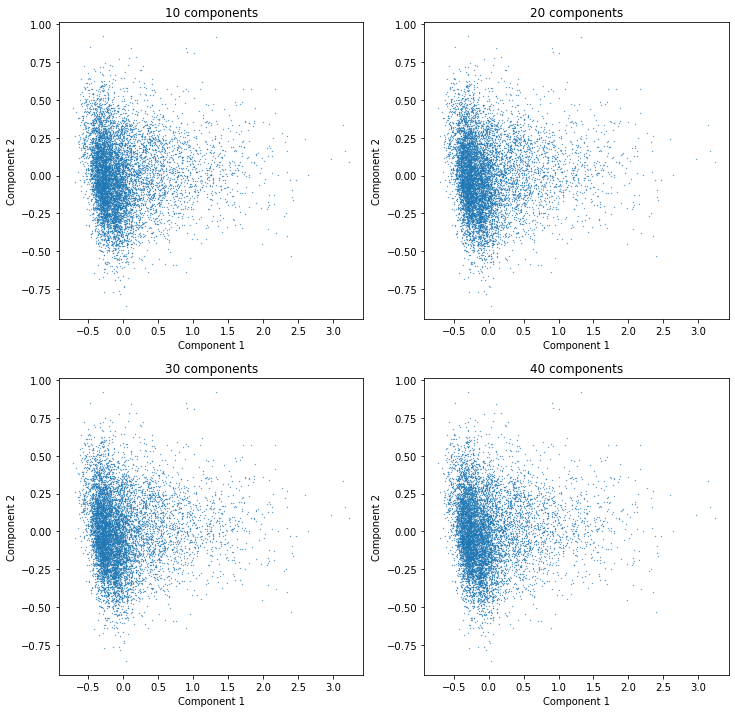

In [42]:
## Perform PCA for the following number of components: 10, 20, 30, 40. 

n_components = [10, 20, 30, 40]
pca_results = []
for n in n_components:
    pca = PCA(n_components=n)
    pca_results.append(pca.fit_transform(X_normalized))

#using 2-d plot to show the reult, the result only show the top two compenent but it is based on 10/20/30/40 components
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    ax.scatter(pca_results[i][:, 0], pca_results[i][:, 1], s=0.1)
    ax.set_title(f"{n_components[i]} components")
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
plt.show()


In [ ]:
# Choose one model that you used from Milestone 1. 
#For each PCA-transformed version of the dataset, perform k cross-validation on the data with the model. 
#Compare the performances between each version and the original standardized dataset. 


In [49]:
#check the size of the data set
#for component:2
print(f"PCA result 0 shape: {X_pca.shape}")
#for components: 10, 20, 30, 40. 
for i, result in enumerate(pca_results):
    print(f"PCA result {i + 1} shape: {result.shape}")

(7926, 2)
PCA result 0 shape: (7926, 2)
PCA result 1 shape: (7926, 10)
PCA result 2 shape: (7926, 20)
PCA result 3 shape: (7926, 30)
PCA result 4 shape: (7926, 40)


In [102]:
# for component=2
model = KNeighborsRegressor(n_neighbors=5)
kf = KFold(n_splits=10, shuffle=True, random_state=106)
mse = make_scorer(mean_squared_error, greater_is_better=False)
# Cross validation
scores_before = cross_validate(model, X, y, cv=kf, scoring=mse, return_train_score=True)
scores_after = cross_validate(model, X_normalized, y, cv=kf, scoring=mse, return_train_score=True)
scores_pca = cross_validate(model, X_pca, y, cv=kf, scoring=mse, return_train_score=True)

# Paired t-test
t_in_sample, p_in_sample = stats.ttest_rel(scores_after['train_score'], scores_pca['train_score'])
t_out_sample, p_out_sample = stats.ttest_rel(scores_after['test_score'], scores_pca['test_score'])

print("Paired t-test results for In-sample: ")
print("t-statistic: %f, p-value : %e"% (t_in_sample, p_in_sample))
print("Paired t-test results for Out-sample: ")
print("t-statistic: %f, p-value : %e"% (t_out_sample, p_out_sample))


print(f"Train scores without normalized before PCA: {-1*scores_before['train_score'].mean():.2f}")
print(f"Train scores normalized before PCA: {-1*scores_after['train_score'].mean():.2f}")
print(f"Train scores after PCA: {-1*scores_pca['train_score'].mean():.2f}")
print(f"Test scores without normalized before PCA: {-1*scores_before['train_score'].mean():.2f}")
print(f"Test scores normalized before PCA: {-1*scores_after['test_score'].mean():.2f}")
print(f"Test scores after PCA: {-1*scores_pca['test_score'].mean():.2f}")


Paired t-test results for In-sample: 
t-statistic: 173.879215, p-value : 3.500362e-17
Paired t-test results for Out-sample: 
t-statistic: 23.919911, p-value : 1.863386e-09
Train scores without normalized before PCA: 0.08
Train scores normalized before PCA: 0.02
Train scores after PCA: 0.06
Test scores without normalized before PCA: 0.08
Test scores normalized before PCA: 0.04
Test scores after PCA: 0.09


In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, make_scorer
from scipy import stats

# Loop over different number of components
for i, n in enumerate([10, 20, 30, 40]):
    # Extract the data from pca_results using the corresponding index
    X_pca = pca_results[i]
    
    # kNN regression with cross validation
    model = KNeighborsRegressor(n_neighbors=5)
    kf = KFold(n_splits=10, shuffle=True, random_state=106)
    mse = make_scorer(mean_squared_error, greater_is_better=False)

    scores_before = cross_validate(model, X, y, cv=kf, scoring=mse, return_train_score=True)
    scores_after = cross_validate(model, X_normalized, y, cv=kf, scoring=mse, return_train_score=True)
    scores_pca = cross_validate(model, X_pca, y, cv=kf, scoring=mse, return_train_score=True)

    # Paired t-test
    t_in_sample, p_in_sample = stats.ttest_rel(scores_after['train_score'], scores_pca['train_score'])
    t_out_sample, p_out_sample = stats.ttest_rel(scores_after['test_score'], scores_pca['test_score'])

    print(f"\nResults for {n} components: ")
    print("Paired t-test results for In-sample: ")
    print("t-statistic: %f, p-value : %e"% (t_in_sample, p_in_sample))
    print("Paired t-test results for Out-sample: ")
    print("t-statistic: %f, p-value : %e"% (t_out_sample, p_out_sample))
    print(f"Train scores without normalized before PCA: {-1*scores_before['train_score'].mean():.2f}")
    print(f"Train scores normalized before PCA : {-1*scores_after['train_score'].mean():.2f}")
    print(f"Train scores after PCA: {-1*scores_pca['train_score'].mean():.2f}")
    print(f"Test scores without normalized before PCA: {-1*scores_before['train_score'].mean():.2f}")
    print(f"Test scores normalized  before PCA: {-1*scores_after['test_score'].mean():.2f}")
    print(f"Test scores after PCA: {-1*scores_pca['test_score'].mean():.2f}")



Results for 10 components: 
Paired t-test results for In-sample: 
t-statistic: 3.035368, p-value : 1.412340e-02
Paired t-test results for Out-sample: 
t-statistic: 0.091708, p-value : 9.289390e-01
Train scores without normalized before PCA: 0.08
Train scores normalized before PCA : 0.02
Train scores after PCA: 0.02
Test scores without normalized before PCA: 0.08
Test scores normalized  before PCA: 0.04
Test scores after PCA: 0.04

Results for 20 components: 
Paired t-test results for In-sample: 
t-statistic: -1.393733, p-value : 1.968518e-01
Paired t-test results for Out-sample: 
t-statistic: -0.949333, p-value : 3.672449e-01
Train scores without normalized before PCA: 0.08
Train scores normalized before PCA : 0.02
Train scores after PCA: 0.02
Test scores without normalized before PCA: 0.08
Test scores normalized  before PCA: 0.04
Test scores after PCA: 0.04

Results for 30 components: 
Paired t-test results for In-sample: 
t-statistic: -1.450267, p-value : 1.809236e-01
Paired t-test 